In [1]:
from __future__ import print_function, division
from builtins import range

In [2]:
import numpy as np
import theano
import theano.tensor as T
import q_learning

In [7]:
class SGDRegressor:
    def __init__(self, D):
        print("Hello Theano!")
        w = np.random.randn(D) / np.sqrt(D)
        self.w = theano.shared(w)
        self.lr = 0.1
        
        X = T.matrix('X')
        Y = T.vector('Y')
        Y_hat = X.dot(self.w)
        delta = Y - Y_hat
        cost = delta.dot(delta)
        grad = T.grad(cost, self.w)
        updates = [(self.w, self.w - self.lr * grad)]
        
        self.train_op = theano.function(
            inputs = [X, Y],
            updates = updates,
        )
        
        self.predict_op = theano.function(
            inputs = [X],
            outputs = Y_hat
        )
    
    def partial_fit(self, X, Y):
        self.train_op(X, Y)
        
    def predict(self, X):
        return self.predict_op(X)

Hello Theano!
Hello Theano!
episode: 0 total reward: 23.0 eps: 1.0 avg reward (last 100): 23.0
episode: 100 total reward: 157.0 eps: 0.099503719021 avg reward (last 100): 104.465346535
episode: 200 total reward: 199.0 eps: 0.0705345615859 avg reward (last 100): 166.326732673
episode: 300 total reward: 199.0 eps: 0.0576390417704 avg reward (last 100): 197.752475248
episode: 400 total reward: 199.0 eps: 0.0499376169439 avg reward (last 100): 192.861386139
avg reward for last 100 episodes: 194.8
total steps: 85528.0


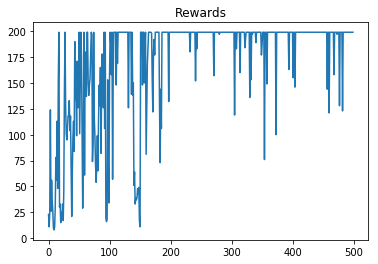

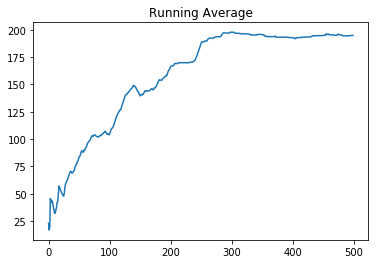

In [8]:
if __name__ == '__main__':
    q_learning.SGDRegressor = SGDRegressor
    q_learning.main()